In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets._california_housing import fetch_california_housing
from sklearn import tree

In [2]:
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
regressor = tree.DecisionTreeRegressor(max_depth=2)

X = housing.data[:, [6, 7]]
Y = housing.target
regressor.fit(X=X, y=Y)

DecisionTreeRegressor(max_depth=2)

In [4]:
dotData = tree.export_graphviz(decision_tree=regressor, out_file=None, feature_names=housing.feature_names[6:8],
                               filled=True, impurity=False, rounded=True)
dotData

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Latitude <= 37.935\\nsamples = 20640\\nvalue = 2.069", fillcolor="#f0b990"] ;\n1 [label="Longitude <= -121.865\\nsamples = 17106\\nvalue = 2.205", fillcolor="#efb082"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="samples = 3225\\nvalue = 2.915", fillcolor="#e58139"] ;\n1 -> 2 ;\n3 [label="samples = 13881\\nvalue = 2.04", fillcolor="#f1bb93"] ;\n1 -> 3 ;\n4 [label="Latitude <= 38.915\\nsamples = 3534\\nvalue = 1.407", fillcolor="#f9e4d5"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="samples = 2439\\nvalue = 1.591", fillcolor="#f7d8c2"] ;\n4 -> 5 ;\n6 [label="samples = 1095\\nvalue = 0.999", fillcolor="#ffffff"] ;\n4 -> 6 ;\n}'

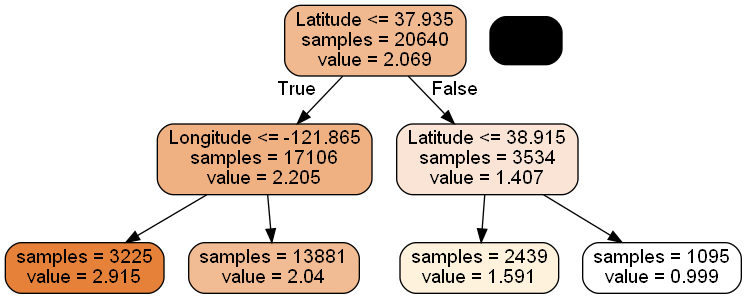

In [5]:
import pydotplus

graph = pydotplus.graph_from_dot_data(dotData)
graph.get_nodes()[7].set_fillcolor('#FFF2DD')

from IPython.display import Image

Image(graph.create_png())

In [20]:
graph.write_png('../../data/output/white_background.png')

True